In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [413]:
#Read in data
df = pd.read_csv("data/match_samps.csv")
df.head(10)


,stats.name,matchId,gameDuration,gameMode,map,matchType,assetsId,stats.DBNOs,stats.assists,stats.boosts,...,stats.rideDistance,stats.roadKills,stats.swimDistance,stats.teamKills,stats.timeSurvived,stats.vehicleDestroys,stats.walkDistance,stats.weaponsAcquired,stats.winPlace,stats.rank
0,Im_On__MtnDew,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,6c5c4a01-fbca-11eb-923b-024fe0016bcd,1.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,446.0,0.0,327.442260,0.0,26.0,Unranked
1,th53053_0,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,6c5c4a01-fbca-11eb-923b-024fe0016bcd,1.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,513.0,0.0,162.948850,0.0,10.0,Unranked
2,Baby Yoda3905,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,6c5c4a01-fbca-11eb-923b-024fe0016bcd,3.0,4.0,3.0,...,0.00000,0.0,0.0,0.0,1531.0,0.0,4119.098600,9.0,1.0,Unranked
3,LrritatedWalruv,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,6c5c4a01-fbca-11eb-923b-024fe0016bcd,1.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,438.0,0.0,45.003754,0.0,19.0,Unranked
4,Sachlord,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,6c5c4a01-fbca-11eb-923b-024fe0016bcd,3.0,1.0,4.0,...,921.37854,0.0,0.0,0.0,1181.0,0.0,2319.153300,5.0,6.0,Unranked
5,KuS_hen-sir,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,6c5c4a01-fbca-11eb-923b-024fe0016bcd,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,458.0,0.0,135.144230,0.0,8.0,Unranked
6,jrf_yox,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,6c5c4a01-fbca-11eb-923b-024fe0016bcd,2.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,521.0,0.0,155.300250,0.0,25.0,Unranked
7,KAIWARE_m_k2,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,6c5c4a01-fbca-11eb-923b-024fe0016bcd,3.0,0.0,1.0,...,0.00000,0.0,0.0,0.0,1307.0,0.0,2529.759000,0.0,9.0,Unranked
8,elack5019,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,6c5c4a01-fbca-11eb-923b-024fe0016bcd,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,779.0,0.0,855.980500,0.0,11.0,Unranked
9,IFc_nm,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,6c5c4a01-fbca-11eb-923b-024fe0016bcd,0.0,0.0,2.0,...,0.00000,0.0,0.0,0.0,1199.0,0.0,3117.208700,0.0,13.0,Unranked


In [414]:
#Check out shape of data
df.shape

(20681, 30)

In [415]:
# Drop unwanted data 
A = df.drop(["stats.name", "matchId", "assetsId", "matchType", "stats.deathType", "map", "stats.rank", "stats.playerId"], axis=1)

# Check num of unique game modes
A["gameMode"].describe()


count     20681
unique        6
top       squad
freq       9798
Name: gameMode, dtype: object

In [416]:
A

,gameDuration,gameMode,stats.DBNOs,stats.assists,stats.boosts,stats.damageDealt,stats.headshotKills,stats.heals,stats.killPlace,stats.killStreaks,...,stats.revives,stats.rideDistance,stats.roadKills,stats.swimDistance,stats.teamKills,stats.timeSurvived,stats.vehicleDestroys,stats.walkDistance,stats.weaponsAcquired,stats.winPlace
0,1631,squad,1.0,0.0,0.0,59.280420,0.0,0.0,97.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,446.0,0.0,327.442260,0.0,26.0
1,1631,squad,1.0,0.0,0.0,100.000010,0.0,0.0,27.0,1.0,...,0.0,0.00000,0.0,0.0,0.0,513.0,0.0,162.948850,0.0,10.0
2,1631,squad,3.0,4.0,3.0,428.559880,2.0,3.0,7.0,1.0,...,0.0,0.00000,0.0,0.0,0.0,1531.0,0.0,4119.098600,9.0,1.0
3,1631,squad,1.0,0.0,0.0,100.000010,0.0,0.0,34.0,1.0,...,0.0,0.00000,0.0,0.0,0.0,438.0,0.0,45.003754,0.0,19.0
4,1631,squad,3.0,1.0,4.0,354.702940,0.0,4.0,4.0,1.0,...,2.0,921.37854,0.0,0.0,0.0,1181.0,0.0,2319.153300,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20676,2389,squad-fpp,0.0,0.0,0.0,0.000000,0.0,0.0,50.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,1182.0,0.0,925.466200,0.0,5.0
20677,2389,squad-fpp,9.0,0.0,5.0,1152.074000,5.0,1.0,1.0,3.0,...,0.0,4812.82570,0.0,0.0,0.0,1742.0,0.0,3104.800300,4.0,1.0
20678,2389,squad-fpp,0.0,0.0,0.0,39.594273,0.0,0.0,51.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,1144.0,0.0,903.396670,0.0,5.0
20679,2389,squad-fpp,0.0,0.0,0.0,57.292660,0.0,0.0,80.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,1285.0,0.0,957.147340,0.0,21.0


In [417]:
value_count = A['gameMode'].value_counts()
df_value_counts = pd.DataFrame(value_count)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['gameMode', 'num_games_played']
df_value_counts

,gameMode,num_games_played
0,squad,9798
1,duo,4025
2,solo,3829
3,squad-fpp,2305
4,duo-fpp,562
5,solo-fpp,162


Text(0.5, 1.0, 'Games Played by Game Mode')

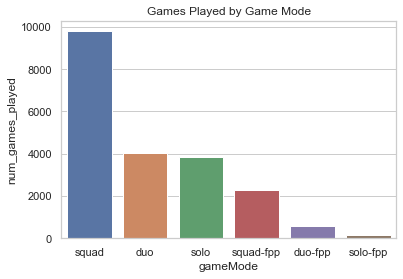

In [418]:
sns.set_theme(style='whitegrid')
ax = sns.barplot(x="gameMode", y="num_games_played", data=df_value_counts)
plt.title("Games Played by Game Mode")


In [419]:
B = A[A['gameMode']=="squad"]
B

,gameDuration,gameMode,stats.DBNOs,stats.assists,stats.boosts,stats.damageDealt,stats.headshotKills,stats.heals,stats.killPlace,stats.killStreaks,...,stats.revives,stats.rideDistance,stats.roadKills,stats.swimDistance,stats.teamKills,stats.timeSurvived,stats.vehicleDestroys,stats.walkDistance,stats.weaponsAcquired,stats.winPlace
0,1631,squad,1.0,0.0,0.0,59.280420,0.0,0.0,97.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,446.0,0.0,327.442260,0.0,26.0
1,1631,squad,1.0,0.0,0.0,100.000010,0.0,0.0,27.0,1.0,...,0.0,0.00000,0.0,0.0,0.0,513.0,0.0,162.948850,0.0,10.0
2,1631,squad,3.0,4.0,3.0,428.559880,2.0,3.0,7.0,1.0,...,0.0,0.00000,0.0,0.0,0.0,1531.0,0.0,4119.098600,9.0,1.0
3,1631,squad,1.0,0.0,0.0,100.000010,0.0,0.0,34.0,1.0,...,0.0,0.00000,0.0,0.0,0.0,438.0,0.0,45.003754,0.0,19.0
4,1631,squad,3.0,1.0,4.0,354.702940,0.0,4.0,4.0,1.0,...,2.0,921.37854,0.0,0.0,0.0,1181.0,0.0,2319.153300,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20383,1826,squad,0.0,1.0,1.0,44.940723,0.0,1.0,25.0,1.0,...,0.0,856.46240,0.0,0.0,0.0,793.0,0.0,1296.497700,7.0,12.0
20384,1826,squad,0.0,0.0,2.0,0.000000,0.0,0.0,41.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,822.0,0.0,1540.633500,6.0,11.0
20385,1826,squad,0.0,0.0,0.0,18.553500,0.0,0.0,52.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,378.0,0.0,192.292250,2.0,14.0
20386,1826,squad,0.0,0.0,0.0,0.000000,0.0,1.0,47.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,464.0,0.0,519.745300,4.0,13.0


In [420]:
B["gameMode"].describe()

count      9798
unique        1
top       squad
freq       9798
Name: gameMode, dtype: object

In [421]:
C = B.drop(columns=["gameMode"])
# numeric_cols = C.select_dtypes(exclude='number')
# C.drop(numeric_cols, axis=0, inplace=True)
C

,gameDuration,stats.DBNOs,stats.assists,stats.boosts,stats.damageDealt,stats.headshotKills,stats.heals,stats.killPlace,stats.killStreaks,stats.kills,...,stats.revives,stats.rideDistance,stats.roadKills,stats.swimDistance,stats.teamKills,stats.timeSurvived,stats.vehicleDestroys,stats.walkDistance,stats.weaponsAcquired,stats.winPlace
0,1631,1.0,0.0,0.0,59.280420,0.0,0.0,97.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,446.0,0.0,327.442260,0.0,26.0
1,1631,1.0,0.0,0.0,100.000010,0.0,0.0,27.0,1.0,1.0,...,0.0,0.00000,0.0,0.0,0.0,513.0,0.0,162.948850,0.0,10.0
2,1631,3.0,4.0,3.0,428.559880,2.0,3.0,7.0,1.0,3.0,...,0.0,0.00000,0.0,0.0,0.0,1531.0,0.0,4119.098600,9.0,1.0
3,1631,1.0,0.0,0.0,100.000010,0.0,0.0,34.0,1.0,1.0,...,0.0,0.00000,0.0,0.0,0.0,438.0,0.0,45.003754,0.0,19.0
4,1631,3.0,1.0,4.0,354.702940,0.0,4.0,4.0,1.0,4.0,...,2.0,921.37854,0.0,0.0,0.0,1181.0,0.0,2319.153300,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20383,1826,0.0,1.0,1.0,44.940723,0.0,1.0,25.0,1.0,1.0,...,0.0,856.46240,0.0,0.0,0.0,793.0,0.0,1296.497700,7.0,12.0
20384,1826,0.0,0.0,2.0,0.000000,0.0,0.0,41.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,822.0,0.0,1540.633500,6.0,11.0
20385,1826,0.0,0.0,0.0,18.553500,0.0,0.0,52.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,378.0,0.0,192.292250,2.0,14.0
20386,1826,0.0,0.0,0.0,0.000000,0.0,1.0,47.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,464.0,0.0,519.745300,4.0,13.0


In [422]:
C.dtypes

gameDuration               int64
stats.DBNOs              float64
stats.assists            float64
stats.boosts             float64
stats.damageDealt        float64
stats.headshotKills      float64
stats.heals              float64
stats.killPlace          float64
stats.killStreaks        float64
stats.kills              float64
stats.longestKill        float64
stats.revives            float64
stats.rideDistance       float64
stats.roadKills          float64
stats.swimDistance       float64
stats.teamKills          float64
stats.timeSurvived       float64
stats.vehicleDestroys    float64
stats.walkDistance       float64
stats.weaponsAcquired    float64
stats.winPlace           float64
dtype: object

In [423]:
C.isnull().sum()

gameDuration             0
stats.DBNOs              0
stats.assists            0
stats.boosts             0
stats.damageDealt        0
stats.headshotKills      0
stats.heals              0
stats.killPlace          0
stats.killStreaks        0
stats.kills              0
stats.longestKill        0
stats.revives            0
stats.rideDistance       0
stats.roadKills          0
stats.swimDistance       0
stats.teamKills          0
stats.timeSurvived       0
stats.vehicleDestroys    0
stats.walkDistance       0
stats.weaponsAcquired    0
stats.winPlace           0
dtype: int64

In [424]:
C.corr()

,gameDuration,stats.DBNOs,stats.assists,stats.boosts,stats.damageDealt,stats.headshotKills,stats.heals,stats.killPlace,stats.killStreaks,stats.kills,...,stats.revives,stats.rideDistance,stats.roadKills,stats.swimDistance,stats.teamKills,stats.timeSurvived,stats.vehicleDestroys,stats.walkDistance,stats.weaponsAcquired,stats.winPlace
gameDuration,1.000000,-0.024671,-0.107632,-0.093987,-0.039835,-0.042734,-0.054741,0.116298,-0.026488,-0.016992,...,-0.087297,-0.025893,0.006251,0.065757,0.007492,0.463303,-0.015013,0.045745,-0.278058,0.049872
stats.DBNOs,-0.024671,1.000000,0.420182,0.429501,0.843294,0.580897,0.312425,-0.585333,0.703797,0.867424,...,0.333070,0.199442,0.117169,-0.028453,0.113939,0.221933,0.123691,0.161452,0.271094,-0.270273
stats.assists,-0.107632,0.420182,1.000000,0.464041,0.554535,0.301450,0.289020,-0.332746,0.323244,0.418903,...,0.259115,0.264114,0.058068,-0.045232,0.026907,0.186181,0.129957,0.164070,0.352113,-0.306113
stats.boosts,-0.093987,0.429501,0.464041,1.000000,0.548211,0.356641,0.457431,-0.487085,0.386650,0.463058,...,0.271421,0.462491,0.062755,-0.029373,0.020569,0.412602,0.160708,0.302278,0.506976,-0.501976
stats.damageDealt,-0.039835,0.843294,0.554535,0.548211,1.000000,0.614213,0.363890,-0.590582,0.689216,0.872328,...,0.268756,0.244030,0.090703,-0.032781,0.015883,0.292409,0.149338,0.211737,0.343493,-0.360651
stats.headshotKills,-0.042734,0.580897,0.301450,0.356641,0.614213,1.000000,0.208952,-0.399365,0.489068,0.648171,...,0.178569,0.167262,0.049334,-0.030337,0.015647,0.167694,0.096999,0.153282,0.251608,-0.232553
stats.heals,-0.054741,0.312425,0.289020,0.457431,0.363890,0.208952,1.000000,-0.344579,0.275198,0.317507,...,0.225089,0.301593,0.054631,0.018386,0.006109,0.294084,0.100250,0.218055,0.313524,-0.317302
stats.killPlace,0.116298,-0.585333,-0.332746,-0.487085,-0.590582,-0.399365,-0.344579,1.000000,-0.779780,-0.662265,...,-0.203627,-0.269504,-0.081217,-0.026856,-0.025930,-0.436425,-0.111474,-0.289112,-0.314120,0.687274
stats.killStreaks,-0.026488,0.703797,0.323244,0.386650,0.689216,0.489068,0.275198,-0.779780,1.000000,0.795740,...,0.202329,0.152701,0.090747,-0.002032,0.027638,0.256578,0.105635,0.173583,0.217877,-0.306515
stats.kills,-0.016992,0.867424,0.418903,0.463058,0.872328,0.648171,0.317507,-0.662265,0.795740,1.000000,...,0.234538,0.196786,0.123612,-0.016924,0.020545,0.272337,0.141240,0.190930,0.261008,-0.340852


Text(0.5, 1.0, 'Seaborn')

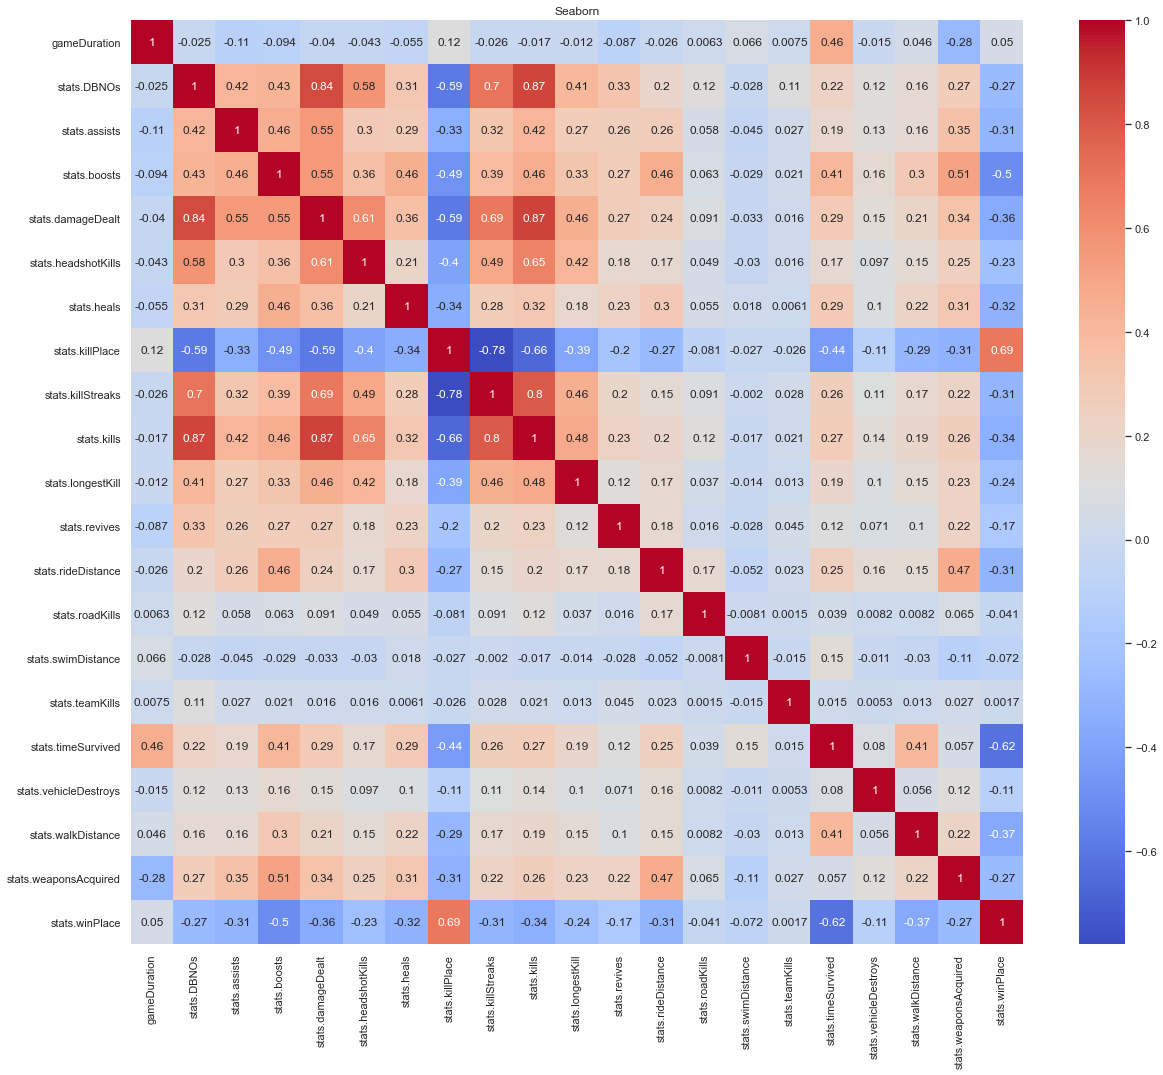

In [425]:
plt.figure(figsize=(20,17))
sns.heatmap(C.corr(), annot=True, cmap="coolwarm").set_title('Seaborn')

C:\Users\tbrid\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


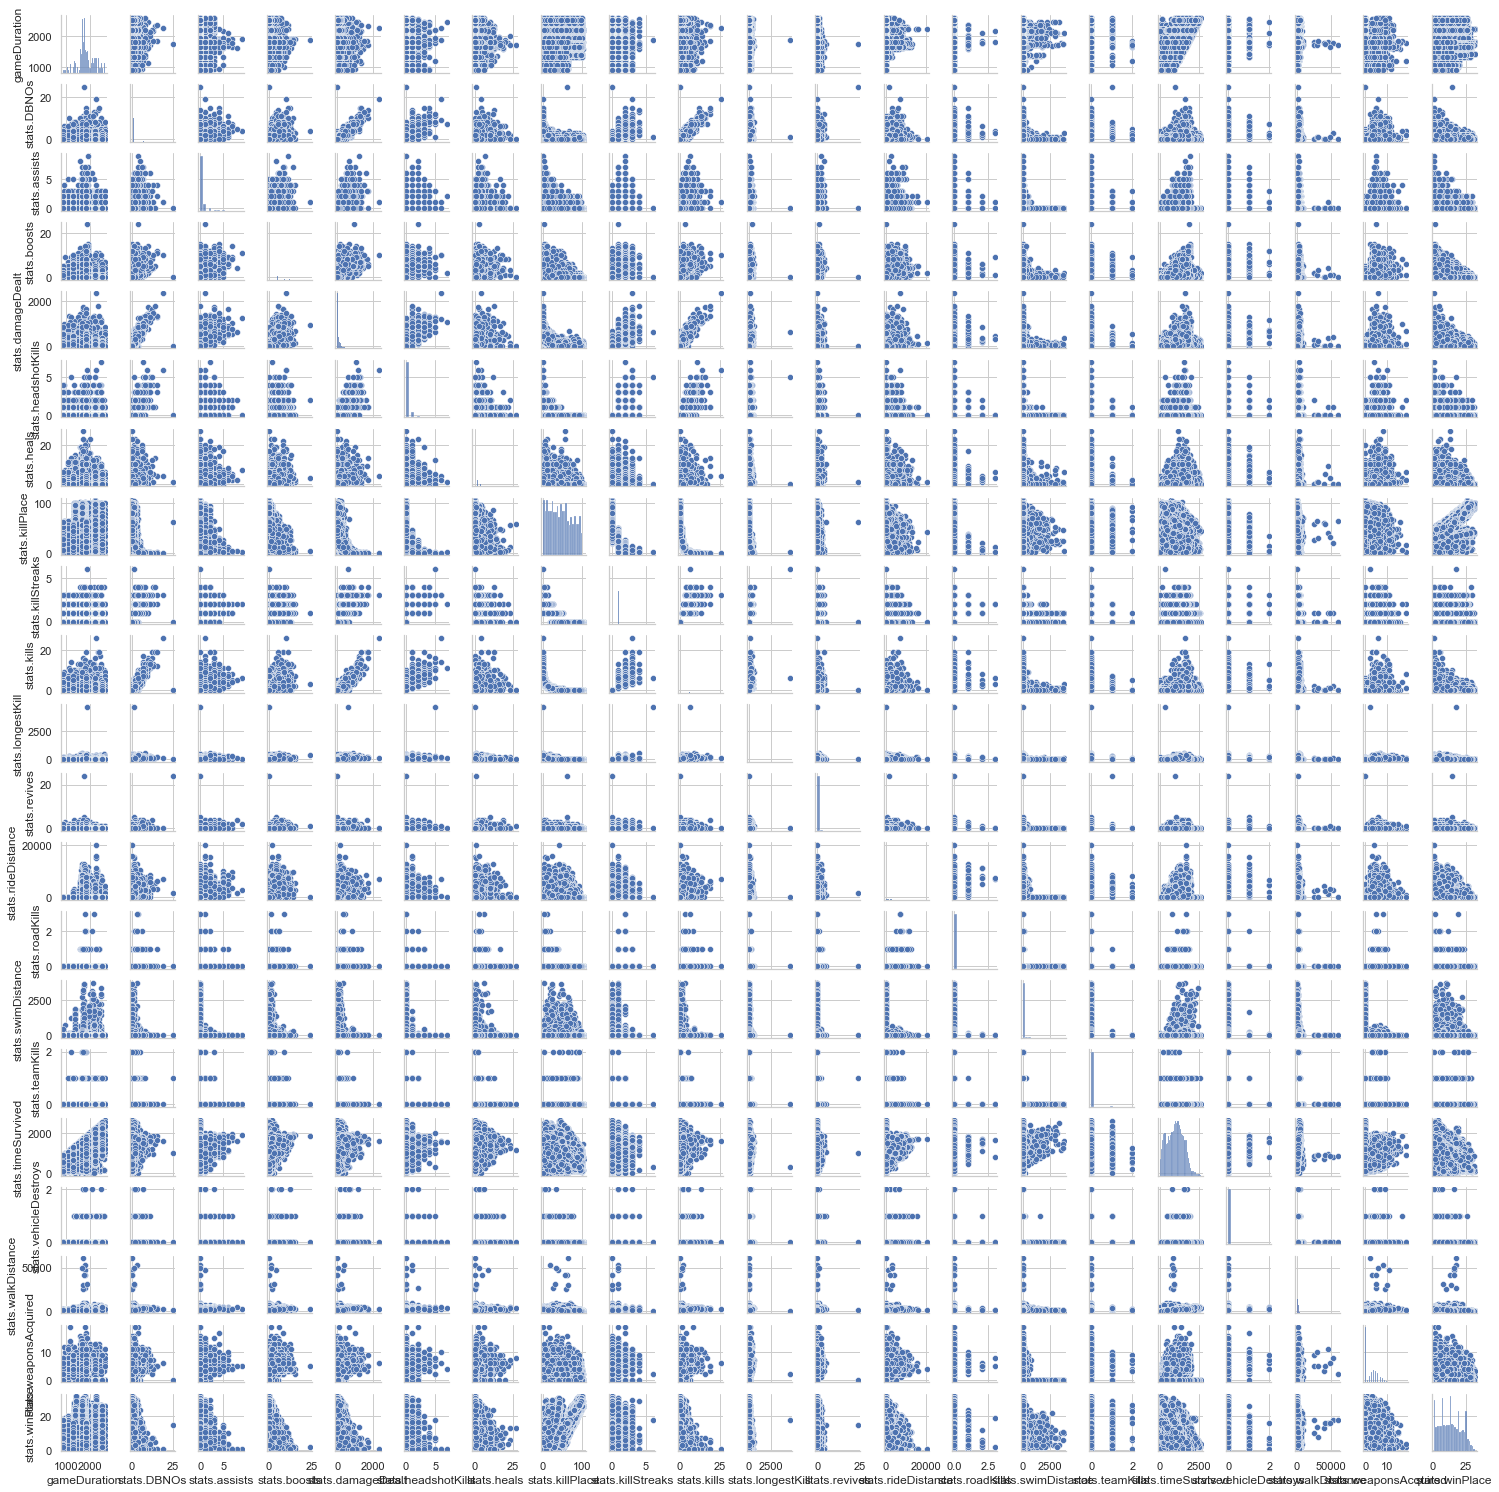

In [426]:
#compare heat matrix and pairplot positive correlations
pubg_pairplot = C.dropna()
sns.pairplot(pubg_pairplot, size=1);

# R2 and Train/Test Split, Regression

In [427]:
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate some data
X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)

# Create a linear model
model = LinearRegression()

# Fit (Train) our model to the data
model.fit(X, y)

LinearRegression()

In [428]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 11.933040779746149
R-squared (R2 ): 0.903603363418708


In [429]:
model.score(X, y)

0.903603363418708

In [430]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [431]:
model.fit(X_train, y_train)

LinearRegression()

In [432]:
model.score(X_test, y_test)

0.9252522435044104

# Remove Low Variance Features

In [433]:
from sklearn.feature_selection import VarianceThreshold

x = C
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit(x)
sel.transform(x)

array([[1.6310000e+03, 1.0000000e+00, 0.0000000e+00, ..., 3.2744226e+02,
        0.0000000e+00, 2.6000000e+01],
       [1.6310000e+03, 1.0000000e+00, 0.0000000e+00, ..., 1.6294885e+02,
        0.0000000e+00, 1.0000000e+01],
       [1.6310000e+03, 3.0000000e+00, 4.0000000e+00, ..., 4.1190986e+03,
        9.0000000e+00, 1.0000000e+00],
       ...,
       [1.8260000e+03, 0.0000000e+00, 0.0000000e+00, ..., 1.9229225e+02,
        2.0000000e+00, 1.4000000e+01],
       [1.8260000e+03, 0.0000000e+00, 0.0000000e+00, ..., 5.1974530e+02,
        4.0000000e+00, 1.3000000e+01],
       [1.8260000e+03, 2.0000000e+00, 1.0000000e+00, ..., 1.3643522e+03,
        3.0000000e+00, 1.1000000e+01]])

In [434]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#SelectKBest?

In [435]:
X, y = load_iris(return_X_y=True)
sel = SelectKBest(chi2, k=2)
sel.fit(X, y)

SelectKBest(k=2, score_func=<function chi2 at 0x000002A903F021F0>)

In [436]:
sel.transform(X).shape

(150, 2)

In [437]:
sel.scores_

array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ])

# Recursive Feature Elimination

In [438]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
#RFECV?

In [439]:
m = RFECV(RandomForestClassifier(),scoring='accuracy')

In [440]:
m.fit(X, y)

RFECV(estimator=RandomForestClassifier(), scoring='accuracy')

In [441]:
m.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [442]:
m.score(X, y)

0.9933333333333333

In [443]:
m.transform(X).shape


(150, 2)

In [444]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

#SelectFromModel?

In [445]:
m = SelectFromModel(LinearSVC(C=0.01, penalty='l1', dual=False))

m.fit(X, y)

C:\Users\tbrid\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SelectFromModel(estimator=LinearSVC(C=0.01, dual=False, penalty='l1'))

In [446]:
m.transform(X).shape


(150, 3)

In [447]:

from sklearn.linear_model import LassoCV


X, y = load_boston(return_X_y=True)

print(X.shape)

m = SelectFromModel(LassoCV())

m.fit(X, y)

m.transform(X).shape

(506, 13)


(506, 10)